# 0. Depêndencias

In [179]:
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import random

# 1. Tratamento dos Dados





Leitura do Data Frame:



In [ ]:
df = pd.read_csv("vgsales.csv",header=0, sep=',')
df



---







Para os dados em inglês se tornarem mais legíveis, foram feitos os seguintes tratamentos:

*   Colunas traduzidas para Português












In [ ]:
df.rename(columns={'Name': 'Jogo', 'Platform': 'Plataforma', 'Year': 'Ano de Lançamento',
                   'Genre': 'Gênero', 'Publisher': 'Publicadora', 'NA_Sales': 'Vendas América do Norte',
                   'EU_Sales': 'Vendas Europa', 'JP_Sales': 'Vendas Japão', 'Other_Sales': 'Vendas Resto do Mundo',
                   'Global_Sales': 'Vendas Globais'}, inplace=True)
df.columns

*   Valores NaN e "Unknown" na coluna "Publicadora" Convertidos para "Desconhecido"

In [ ]:
df[(df['Publicadora'] == "Unknown")]

In [ ]:
df['Publicadora'].fillna('Unknown', inplace=True)
df['Publicadora'].replace('Unknown', 'Desconhecido', inplace=True)
df[(df['Publicadora'] == "Desconhecido")]



---








Para dados na coluna 'Ano de Lançamento', foram feitos os seguintes tratamentos:


*   Valores NaN foram convertidos para 0
*   A coluna "Ano de Lançamento" é convertida para integer








In [ ]:
df['Ano de Lançamento'].fillna(0, inplace=True)
df[(df['Ano de Lançamento'] == 0)]

In [ ]:
df['Ano de Lançamento'] = df['Ano de Lançamento'].astype(int)
df

Vamos guardar os valores nulos e desconhecidos em seu próprio <br>
DataFrame para análisa-lo separadamente:

In [ ]:
df_nulo = df.loc[(df['Ano de Lançamento'] == 0) | (df['Publicadora'] == "Desconhecido")]
df_nulo.info()

*   Por fim, valores 0 são dropados do Data Frame
> Adicionalmente, Jogos Lançados após 2016 também são dropados por conta dos dados coletados serem escassos e não representativos de todos os jogos lançados em seus respectivos anos, com isso foi preferível limitar o Data Frame para até 2016



In [ ]:
index_deletavel = df.loc[(df['Ano de Lançamento'] == 0) | (df['Ano de Lançamento']>2016)].index
for a in index_deletavel:
    df.drop(index = a, inplace=True)
    
df[(df['Ano de Lançamento'] == 0)]



---



# 2. Funções de auxilio


#### 2.1 Funções Diversas

In [188]:
def Paleta_de_cor_random():
    colorset = ['Set2', 'Set1', 'Accent', 'CMRmap', 'Paired', 'Dark2', 'PiYG', 'Spectral', 'brg', 'tab20c', 'tab20']
    return random.choice(colorset)

> **Paleta_de_cor_random:** é responsável por chamar uma paleta de cor aleatória aos gráficos que pedirem

# 3. Manipulando o DataSet

## 3.1 Jogos que renderam menos de 1 milhão de cópias vendidas **(BOXPLOT)**

In [ ]:
df_menorMilhao = df[(df['Vendas Globais'] < 1.00)]
plt.rcParams["figure.figsize"] = (5, 5)
plt.title('Jogos que Renderam Menos de 1 Milhão de Cópias')
bxplot = plt.boxplot(df_menorMilhao['Vendas Globais'], patch_artist=True)
for patch in bxplot['boxes']:
    patch.set_facecolor('cyan')
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bxplot[element], color='blue')
plt.show();

In [ ]:
df_menorMilhao['Vendas Globais'].mean()

In [ ]:
resultado = (df_menorMilhao.shape[0] * 100) / df.shape[0]
print(f"{resultado:.2f}%")

In [ ]:
df_menorcemmil = df[(df['Vendas Globais'] < 0.10)]
resultado = (df_menorcemmil.shape[0] * 100) / df_menorMilhao.shape[0]
print(f"{resultado:.2f}%")

##### Análise

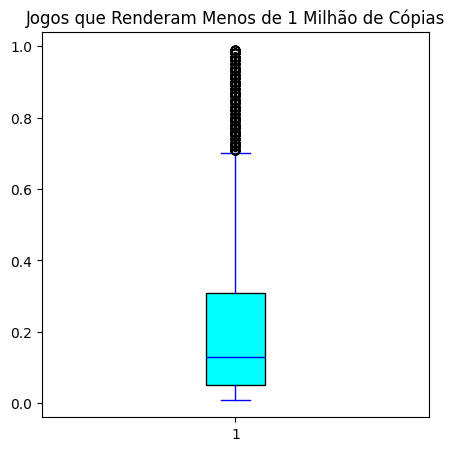

Análisando os jogos que venderam menos de um milhão, fica claro que sucesso é para os poucos, <br>
compondo **87.39%** do número total de entradas no DataFrame. <br>

Mais impressionante é que a média entre esses jogos é de apenas 220 mil cópias vendidas, <br>
sendo que **39.79%** não chegam a ultrapassar a marca de 100 mil cópias vendidas

**Bônus:** <br>
**3.69%** dos jogos registrados no DataFrame não ultrapassaram 10 mil cópias vendidas

In [ ]:
dataFrame = df[(df['Vendas Globais'] < 0.02)]
resultado = (dataFrame.shape[0] * 100) / df.shape[0]
print(f"{resultado:.2f}%")

## 3.2 Dividindo *DataSet* por década



Para a segunda divisão, vou pegar as diferentes décadas dos jogos registrados e formar diferetes *DataFrames*, <br>mas antes temos que descobrir quais são os anos mínimos e máximos listados no *DataFrame*

In [ ]:
list = [df['Ano de Lançamento'].min(), df['Ano de Lançamento'].max()]
list

com isso podemos determinar que faremos 4 divisões, usando o *df.loc*, para os anos:
* 80'
* 90'
* 00' (ou 2000)
* 10' (ou 2010)

In [195]:
dec80_df = df.loc[(df['Ano de Lançamento'] < 1990)]
dec90_df = df.loc[(df['Ano de Lançamento'] >= 1990) & (df['Ano de Lançamento'] < 2000)]
dec00_df = df.loc[(df['Ano de Lançamento'] >= 2000) & (df['Ano de Lançamento'] < 2010)]
dec10_df = df.loc[(df['Ano de Lançamento'] >= 2010) & (df['Ano de Lançamento'] < 2020)]

### 3.2.1 Contagem de jogos lançados por década **(BAR & BOXPLOT)**



Agora que estão separados por décadas, podemos produzir um <br>gráfico contando quantos jogos de cada década foram registrados!

In [ ]:
epocas = ["80'", "90'", "00'", "10'"]

cont = [dec80_df.shape[0], dec90_df.shape[0], dec00_df.shape[0], dec10_df.shape[0]]
#shape está determinando o tamanho de cada um dos dataFrames que separamos

ax = plt.subplot()
plt.rcParams["figure.figsize"] = (7, 5)
ax.set(title='quantidade de jogos por década')
bar = plt.bar(epocas, cont, color=sns.color_palette(Paleta_de_cor_random()))
ax.bar_label(bar, fmt=lambda x: f'{x:.0f}');

Para reforçar os dados podemos criar um BoxPlot <br>
com os dados dos anos de lançamento do DataFrame

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.title('Anos de Lançamento')
bxplot = plt.boxplot(df['Ano de Lançamento'], patch_artist=True)
for patch in bxplot['boxes']:
    patch.set_facecolor('cyan')
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bxplot[element], color='blue')
plt.show();



>Destaque para o sns.color_pallete, que está determinando a <br>
>paleta de cores usada pelo gráfico, com minha função de <br>
>randomizar a paleta escolhida o resultado sempre será diferente. <br>
>Mais info em: **2.1 Funções Diversas**.

##### Análise:

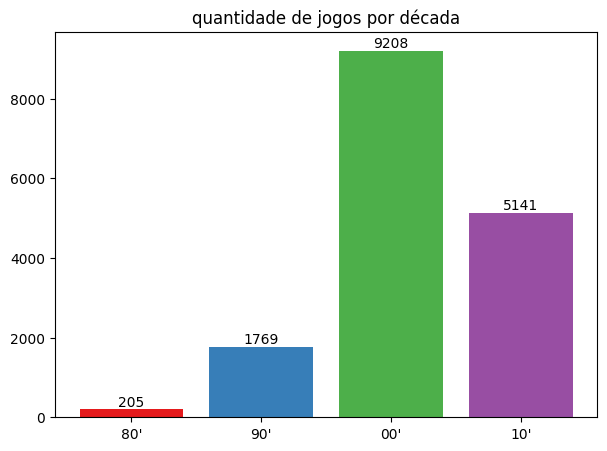 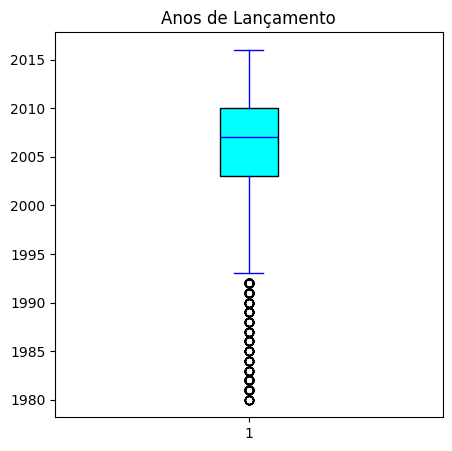

Os dados apresentam uma tendência impressionante, mas pode ter sido afetado pela qualidade do dataFrame <br>
e possivelmente a filtragem de valores nulos que executamos, pois uma pesquisa rápida em sites como a wikipedia <br>
em: https://pt.wikipedia.org/wiki/Categoria:Jogos_eletr%C3%B4nicos_da_d%C3%A9cada_de_1980 <br>
revela que devem existir pelos menos 383 jogos no periodo dos anos 80.<br>
Apesar disso o crescimento na quantidade de jogos não deixa de ser substancial. <br>

In [ ]:
dec00_analise = df.loc[(df['Ano de Lançamento'] >= 2000) & (df['Ano de Lançamento'] < 2006)]
epocas = ["parcial 00'", "10'"]

cont = [dec00_analise.shape[0], dec10_df.shape[0]]
ax = plt.subplot()
bar = plt.bar(epocas, cont, color=sns.color_palette(Paleta_de_cor_random()))
ax.bar_label(bar, fmt=lambda x: f'{x:.0f}');


In [ ]:
resultado = (dec10_df.shape[0] * 100) / dec00_analise.shape[0]
print (f'{resultado - 100:.2f}%')

Na década de 2010 é interessante citar que apesar do DataFrame apenas conter jogos entre 2010 e 2016 <br>
comparado ao mesmo periodo de tempo da década de 2000 (entre 2000 e 2006) a década de 2010 teve um <br>
aumento de **24.21%** em jogos publicados.

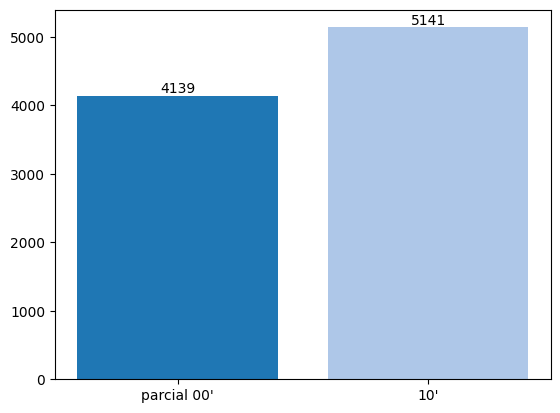

## 3.3 Calculando Vendas

### 3.3.1 Jogos mais vendidos de cada região **(Pandas Series)**

Cada Região no *DataFrame* tem o principal jogo que menos <br>e mais vendeu cópias, 
seria interessante descobrir quem são eles <br>e separa-los por suas devidas regiões 
de maior sucesso:

In [ ]:
df_am_melhor = df.sort_values('Vendas América do Norte', ascending=False).head(1)
df_jp_melhor = df.sort_values('Vendas Japão', ascending=False).head(1)
df_eu_melhor = df.sort_values('Vendas Europa', ascending=False).head(1)
df_rm_melhor = df.sort_values('Vendas Resto do Mundo', ascending=False).head(1)
df_go_melhor = df.sort_values('Vendas Globais', ascending=False).head(1)

# Aqui são organizados os indexes das respectivas colunas 
# pelo número de vendas da devida região usando o sort_values()

# após isso o .head extrai o valor no topo,
# consequentemente o maior valor,
# e o armazena em um novo dataFrame

df_melhores = pd.DataFrame(data={'Região': ['Europa',
                                            'Japão', 
                                            'América',
                                            'Resto do Mundo',
                                            'Vendas Globais'],
                                 
                              'Jogo':[repr(df_eu_melhor['Jogo'].values[0]), 
                                      repr(df_jp_melhor['Jogo'].values[0]), 
                                      repr(df_am_melhor['Jogo'].values[0]),
                                      repr(df_rm_melhor['Jogo'].values[0]),
                                      repr(df_go_melhor['Jogo'].values[0])],
                              #aqui é extraido o valor da coluna jogo do dataFrame filtrado
                              
                              'Plataforma':[repr(df_eu_melhor['Plataforma'].values[0]), 
                                      repr(df_jp_melhor['Plataforma'].values[0]), 
                                      repr(df_am_melhor['Plataforma'].values[0]),
                                      repr(df_rm_melhor['Plataforma'].values[0]),
                                      repr(df_go_melhor['Plataforma'].values[0])],
                              
                              'vendas (em milhões)':[format(float(df_eu_melhor['Vendas Europa'].values[0]), ".2f"),
                                        format(float(df_jp_melhor['Vendas Japão'].values[0]), ".2f"),
                                        format(float(df_am_melhor['Vendas América do Norte'].values[0]), ".2f"),
                                        format(float(df_rm_melhor['Vendas Resto do Mundo'].values[0]), ".2f"),
                                        format(float(df_go_melhor['Vendas Globais'].values[0]), ".2f")]
                              # aqui é extraido não só o valor da coluna de venda, mas o valor é tratado
                              # para se tornar um float com 2 casas decimais
                              })

#df_melhores mostra a tabela pandas
df_melhores.style.set_table_attributes("style='display:inline'").set_caption("Jogo mais cópias vendidas por Região")


##### Análise:

<style type="text/css">
</style>
<table id="T_84a3f" style='display:inline'>
  <caption>Jogo mais cópias vendidas por Região</caption>
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_84a3f_level0_col0" class="col_heading level0 col0" >Região</th>
      <th id="T_84a3f_level0_col1" class="col_heading level0 col1" >Jogo</th>
      <th id="T_84a3f_level0_col2" class="col_heading level0 col2" >Plataforma</th>
      <th id="T_84a3f_level0_col3" class="col_heading level0 col3" >vendas (em milhões)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_84a3f_level0_row0" class="row_heading level0 row0" >0</th>
      <td id="T_84a3f_row0_col0" class="data row0 col0" >Europa</td>
      <td id="T_84a3f_row0_col1" class="data row0 col1" >'Wii Sports'</td>
      <td id="T_84a3f_row0_col2" class="data row0 col2" >'Wii'</td>
      <td id="T_84a3f_row0_col3" class="data row0 col3" >29.02</td>
    </tr>
    <tr>
      <th id="T_84a3f_level0_row1" class="row_heading level0 row1" >1</th>
      <td id="T_84a3f_row1_col0" class="data row1 col0" >Japão</td>
      <td id="T_84a3f_row1_col1" class="data row1 col1" >'Pokemon Red/Pokemon Blue'</td>
      <td id="T_84a3f_row1_col2" class="data row1 col2" >'GB'</td>
      <td id="T_84a3f_row1_col3" class="data row1 col3" >10.22</td>
    </tr>
    <tr>
      <th id="T_84a3f_level0_row2" class="row_heading level0 row2" >2</th>
      <td id="T_84a3f_row2_col0" class="data row2 col0" >América</td>
      <td id="T_84a3f_row2_col1" class="data row2 col1" >'Wii Sports'</td>
      <td id="T_84a3f_row2_col2" class="data row2 col2" >'Wii'</td>
      <td id="T_84a3f_row2_col3" class="data row2 col3" >41.49</td>
    </tr>
    <tr>
      <th id="T_84a3f_level0_row3" class="row_heading level0 row3" >3</th>
      <td id="T_84a3f_row3_col0" class="data row3 col0" >Resto do Mundo</td>
      <td id="T_84a3f_row3_col1" class="data row3 col1" >'Grand Theft Auto: San Andreas'</td>
      <td id="T_84a3f_row3_col2" class="data row3 col2" >'PS2'</td>
      <td id="T_84a3f_row3_col3" class="data row3 col3" >10.57</td>
    </tr>
    <tr>
      <th id="T_84a3f_level0_row4" class="row_heading level0 row4" >4</th>
      <td id="T_84a3f_row4_col0" class="data row4 col0" >Vendas Globais</td>
      <td id="T_84a3f_row4_col1" class="data row4 col1" >'Wii Sports'</td>
      <td id="T_84a3f_row4_col2" class="data row4 col2" >'Wii'</td>
      <td id="T_84a3f_row4_col3" class="data row4 col3" >82.74</td>
    </tr>
  </tbody>
</table>


Interessante Wii Sports estar como primeiro em 2 continentes diferentes, <br>
visto que ele é um jogo que vinha gratuito com o Console de mesa *Wii*<br>
que potencialmente inflou os valores de cópias vendidas, ou nesse caso distribuidas...

Diferente da Europa e a América, o Japão tem uma das franquias mais famosas <br> 
da cultura pop e originária do próprio Japão no topo.

Já no restante do mundo é interessante destacar que *Grand Theft Auto: San Andreas* <br>
é um jogo exclusivamente distribuido **apenas** em *inglês*, o que torna sua popularidade <br>
dominante no restante das regiões do mundo mais impressionante...

In [ ]:
df_rm_melhor

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Rank</th>
      <th>Jogo</th>
      <th>Plataforma</th>
      <th>Ano de Lançamento</th>
      <th>Gênero</th>
      <th>Publicadora</th>
      <th>Vendas América do Norte</th>
      <th>Vendas Europa</th>
      <th>Vendas Japão</th>
      <th>Vendas Resto do Mundo</th>
      <th>Vendas Globais</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>17</th>
      <td>18</td>
      <td>Grand Theft Auto: San Andreas</td>
      <td>PS2</td>
      <td>2004</td>
      <td>Action</td>
      <td>Take-Two Interactive</td>
      <td>9.43</td>
      <td>0.4</td>
      <td>0.41</td>
      <td>10.57</td>
      <td>20.81</td>
    </tr>
  </tbody>
</table>
</div>

E após uma análise mais aprofundada, é notável que o resto do mundo dobrou as vendas <br>
que o jogo teve na sua região de origem.

--- 

Com tudo isso dito, entretanto, os dados estão desatualizados por uma grande margem. <br>

O wii sports está sim entre os jogos mais vendidos mundialmente, e a estatística de 82 milhões em vendas <br>
não está tão longe da atualidade, porém 3 jogos o ultrapassam em vendas <br>
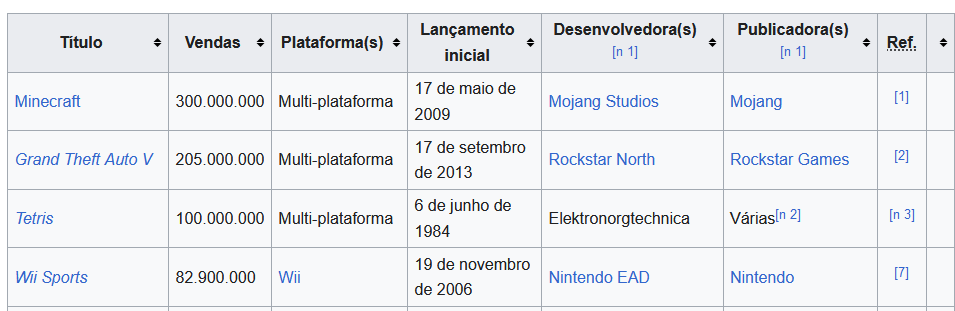<br>
fonte: https://pt.wikipedia.org/wiki/Lista_de_jogos_eletr%C3%B4nicos_mais_vendidos

Mesmo assim, é compreensível o mal entendido, Minecraft, Tetris e GTA 5 foram jogos vendidos em multiplas <br>
plataformas pós seus respectivos lançamentos, alavancando suas vendas anos após os dados do DataFrame serem <br>
apurados, então apesar de justificável, é necessário reconhecer a falta de acurácia dos dados

---

### 3.3.2 Total de Cópias Vendidas por ano **(LINE)**

In [ ]:
vendas_por_ano = df.groupby('Ano de Lançamento')["Vendas Globais"].agg({ "sum"})
plt.title('Total de cópias vendidas por ano')
plt.xlabel('Ano')
plt.ylabel('Total de cópias vendidas')
plt.plot(vendas_por_ano, linestyle='--', color='red');

##### Análise:

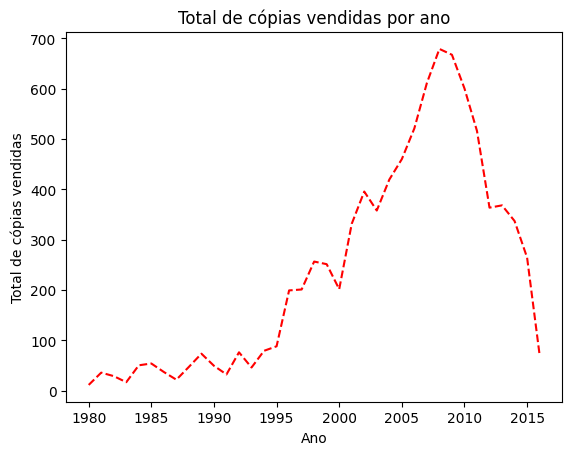

Dados apresentam um aumento significativo pós 1995, que apresenta correlação com pesquisas sobre o crescimento da industria de jogos, <br>
mas o os valores pós 2010 foram afetados pelo número de jogos registrados no *DataFrame*, visto que pós 2010 as vendas <br>
estão despencando, algo improvável considerando outras pesquisas, como por exemplo:

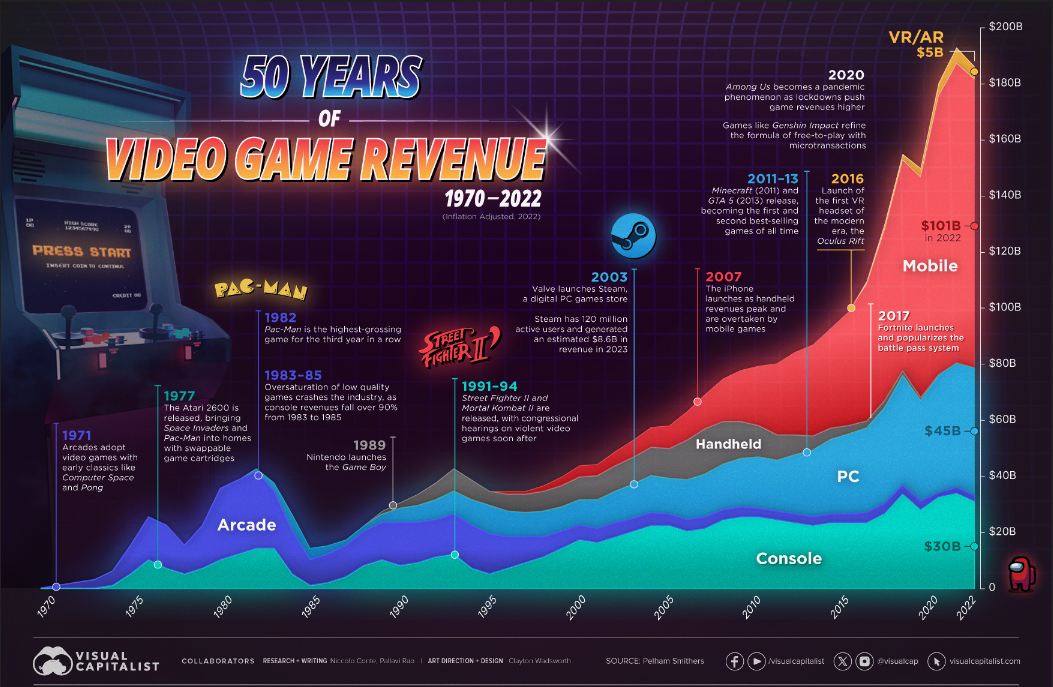 

>fonte: https://www.visualcapitalist.com/video-game-industry-revenues-by-platform/

Que demonstra o constante crescimento no faturamento de todas as plataformas de jogos.

Ou até mesmo estátisticas de crescimento da quantidade de usuários consumindo jogos:

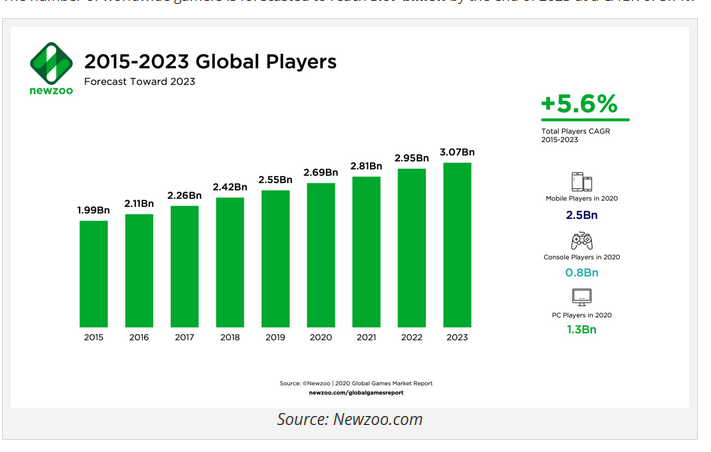

> fonte: https://helplama.com/game-industry-usage-revenue-statistics/

## 3.4 Separando o TOP 100

### 3.4.1 Top 100 jogos mais vendidos **(Pandas Series)** 

In [ ]:
top100_df = df.loc[(df['Rank'] <= 100)]
top100_df.tail()

### 3.4.2 Total de Cópias Vendidas entre o jogo rank 1 ao 100 **(LINE)**

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Total de Cópias Vendidas por posição no rank')
plt.xlabel('Posição no rank')
plt.ylabel('Total de cópias vendidas globalmente')
plt.ylim(0,80)
plt.xlim(1,100)
media = top100_df['Vendas Globais'].mean()
plt.axhline(media, color= '#C06005')
plt.text(2,media + 2, f'Média: {media:.0f}', color = "#C06005")
plt.fill_between(top100_df['Rank'], top100_df['Vendas Globais'], color = '#2E006D');


##### Análise:


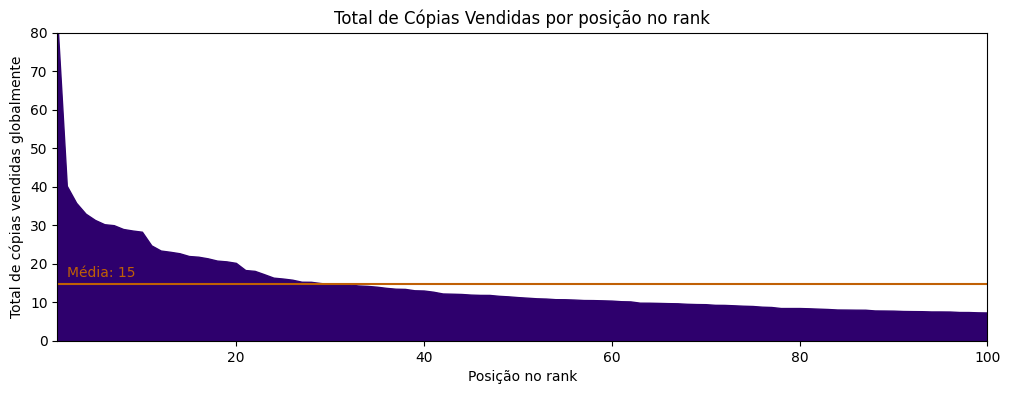

Esse gráfico deixa claro a disparidade em vendas que tem até mesmo entre os jogos que estão no top 100 de mais vendidos <br>
e como foi análisado anteriormente, *wii sports* por ser um jogo distribuido junto de um console, tem o dobro de vendas que <br>
o jogo top 2 da lista.

Com isso dito, a linha no gráfico está ali indicando a média de vendas (em milhões) do top 100.<br>
no gráfico o valor se arrendonda para 15 milhões, apesar da possibilidade de argumento que o valor <br>
de vendas do rank 1 está alavancando a média consideravelmente, fazendo um rápido teste:

In [ ]:
media = top100_df[(top100_df['Rank'] > 1)]
media2 = media['Vendas Globais'].mean()
f'Média: {media2:.0f}'


O resultado da média abaixa em apenas 1 milhão de cópias vendidas, aproximadamente **6,67%** a menos que a média original <br>
Um valor considerável visto que **87.39%** do DataFrame não atingi este valor em vendas.

# Conclusão

#### Concluindo nossa análise, o que aprendemos sobre o DataFrame de *Video Game Sales*?

**1)** A disparidade entre os jogos que mais venderam cópias e a média é gigante. <br>

**2)** A quantidade de jogos vendidos aumentou exponencialmente desde a década de 80, <br>
e apesar do DataFrame estar incompleto na década de 2010, o que fomos apresentados <br>
indica uma projeção de jogos lançados maior que a década de 2000, que podem ser <br>
comprovados por dados pós 2016 apresentados em outras pesquisas. <br>

**3)** o WII Sports é em geral o jogo mais vendido em 2 regiões, mas o japão consome <br>
mais uma franquia popular local enquanto o resto do mundo desfruta de um jogo <br>
exclusivamente inglês. <br>

**4)** Os dados são desatualizados e muitas vezes errados, então apesar de ser interessante analisar <br>
o DataFrame como ele é por estudos, ele é extremamente não confiável. <br>